In [1]:
import torch
from torch.utils.data import DataLoader, Dataset
import numpy as np
import pandas as pd

## Loading structured dataset

In [2]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
iris = fetch_ucirepo(id=53)

# data (as pandas dataframes)
x = iris.data.features
y = iris.data.targets

# metadata
print(iris.metadata)

# variable information
print(iris.variables)

{'uci_id': 53, 'name': 'Iris', 'repository_url': 'https://archive.ics.uci.edu/dataset/53/iris', 'data_url': 'https://archive.ics.uci.edu/static/public/53/data.csv', 'abstract': 'A small classic dataset from Fisher, 1936. One of the earliest known datasets used for evaluating classification methods.\n', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 150, 'num_features': 4, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1936, 'last_updated': 'Tue Sep 12 2023', 'dataset_doi': '10.24432/C56C76', 'creators': ['R. A. Fisher'], 'intro_paper': {'ID': 191, 'type': 'NATIVE', 'title': 'The Iris data set: In search of the source of virginica', 'authors': 'A. Unwin, K. Kleinman', 'venue': 'Significance, 2021', 'year': 2021, 'journal': 'Significance, 2021', 'DOI': '1740-9713.01589', 'URL': 'https://www.semanticscholar.org

In [3]:
x.head()

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
y.head()

,class
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa


In [6]:
df = pd.concat([x, y], axis=1)
df.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
df['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [9]:
{val: index for index, val in enumerate(df['class'].unique())}

{'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}

In [24]:
pd.set_option('future.no_silent_downcasting', True)

In [25]:
class Iris(Dataset):
    def __init__(self, target_col_name='class'):
        from ucimlrepo import fetch_ucirepo

        # fetch dataset
        iris = fetch_ucirepo(id=53)

        # data (as pandas dataframes)
        x = iris.data.features
        y = iris.data.targets
        self.df = pd.concat([x,y], axis=1)
        x = self.df.drop(target_col_name, axis=1).to_numpy()
        self.x = torch.from_numpy(x)

        replacement_dict = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
        y = (
            self.df[target_col_name]
            .replace(replacement_dict)
            .astype(int)
            .to_numpy()
        )
        self.y = torch.from_numpy(y)

    def __getitem__(self, index):
        return self.x[index], self.y[index]

    def __len__(self):
        return self.df.shape[0]


In [27]:
iris_data = Iris()

len(iris_data)

150

In [28]:
iris_data_loader = DataLoader(iris_data, batch_size=8)


In [29]:
for data in iris_data_loader:
    x,y = data
    print(x)
    print(y)
    break

tensor([[5.1000, 3.5000, 1.4000, 0.2000],
        [4.9000, 3.0000, 1.4000, 0.2000],
        [4.7000, 3.2000, 1.3000, 0.2000],
        [4.6000, 3.1000, 1.5000, 0.2000],
        [5.0000, 3.6000, 1.4000, 0.2000],
        [5.4000, 3.9000, 1.7000, 0.4000],
        [4.6000, 3.4000, 1.4000, 0.3000],
        [5.0000, 3.4000, 1.5000, 0.2000]], dtype=torch.float64)
tensor([0, 0, 0, 0, 0, 0, 0, 0])


In [30]:
iris_data_loader = DataLoader(iris_data, batch_size=8, shuffle=True)

In [31]:
for data in iris_data_loader:
    x,y = data
    print(x)
    print(y)
    break

tensor([[6.9000, 3.1000, 5.1000, 2.3000],
        [6.0000, 2.7000, 5.1000, 1.6000],
        [4.9000, 2.4000, 3.3000, 1.0000],
        [4.6000, 3.4000, 1.4000, 0.3000],
        [6.3000, 2.7000, 4.9000, 1.8000],
        [5.7000, 2.8000, 4.5000, 1.3000],
        [6.6000, 2.9000, 4.6000, 1.3000],
        [7.2000, 3.6000, 6.1000, 2.5000]], dtype=torch.float64)
tensor([2, 1, 1, 0, 2, 1, 1, 2])


## Loading Unstructured data

In [1]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, Dataset
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
ROOT = os.path.join("Data", "img_data")
train_path = os.path.join(ROOT, "train")
val_path = os.path.join(ROOT, "validation")

In [5]:
Height, Width, Channel = (224, 224, 3)
IMG_SIZE = (Height, Width)
train_transform = transforms.Compose(
    [
        transforms.Resize(IMG_SIZE),
        transforms.ToTensor()
    ]
)

val_transforms = transforms.Compose(
    [
        transforms.Resize(IMG_SIZE),
        transforms.ToTensor()
    ]
)

In [6]:
train_data = datasets.ImageFolder(
    root=train_path,
    transform=train_transform
    )

train_data_loader = DataLoader(
    train_data,
    batch_size=8,
    shuffle=True
)

In [8]:
data = next(iter(train_data_loader))

In [9]:
len(data)

2

In [10]:
data[0].shape

torch.Size([8, 3, 224, 224])

In [11]:
data[1].shape

torch.Size([8])

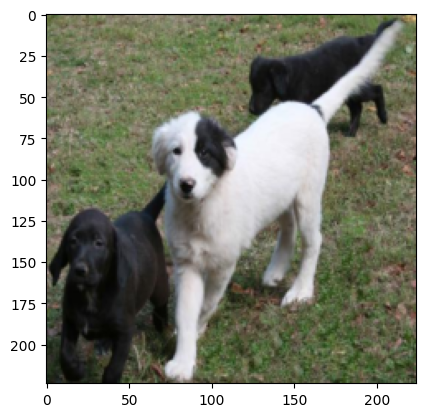

In [16]:
from PIL import Image

plt.imshow(transforms.ToPILImage()(data[0][5]))

In [17]:
data[1][5]

tensor(1)